# 3. Análise exploratória de dados
- cria um DataFrame a partir do arquivo metadados.json
- filtra os fundos listados como "ativos" na data da coleta
- apresenta gráficos de...
- clusteriza

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import grafico

In [2]:
df = pd.read_json("../data/json/metadados.json") # Cria um dataframe do Pandas
df.set_index('Fundo', inplace=True) # Estabelece a coluna "Fundo" como índice

## Extensão do DF

In [3]:
len(df)

149

## Colunas do DataFrame

In [4]:
display(pd.DataFrame(df.columns)) # Colunas do DataFrame

,0
0,CNPJ
1,Código ANBIMA
2,ISIN
3,Patrimônio Líquido
4,Taxa de administração ao ano
5,Primeiro aporte
6,Classe ANBIMA
7,Tipo ANBIMA
8,Classe CVM
9,Sub Classe CVM


## Proporção de fundos classificados como ESG pela Anbima

In [5]:
df.replace("n/d", np.nan, inplace=True) # Substituindo "n/d" por NaN
esg_proportions = df['Fundo ESG'].value_counts(normalize=True) * 100
display(pd.DataFrame(esg_proportions))

,proportion
Fundo ESG,
Sim,55.704698
Não,43.624161
Relacionado,0.671141


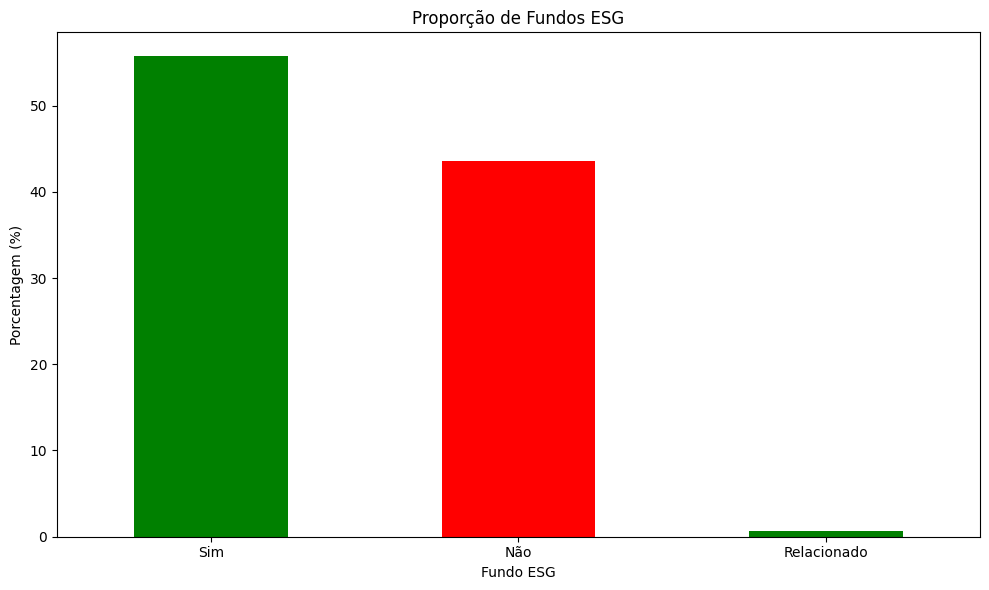

In [6]:
grafico.elaborar_grafico(esg_proportions, titulo='Proporção de Fundos ESG', x_label='Fundo ESG', y_label='Porcentagem (%)', x_ticks_rotation=0, cores=['green', 'red'])

## Proporção de fundos com possibilidade de investimento no exterior

In [7]:
exterior = df['Investimento no exterior'].value_counts(normalize=True) * 100
display(pd.DataFrame(exterior))

,proportion
Investimento no exterior,
Não se Aplica,28.859060
Até 20 %,27.516779
> 67%,22.147651
Até 40 %,15.436242
Até 100%,6.040268


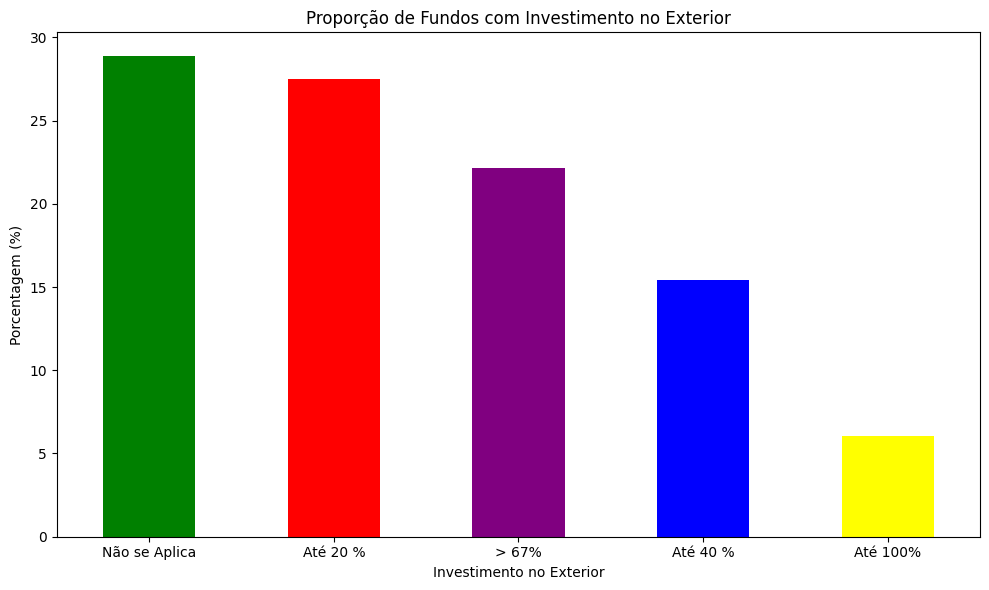

In [8]:
# Em gráfico
grafico.elaborar_grafico(dados=exterior, titulo='Proporção de Fundos com Investimento no Exterior', x_label='Investimento no Exterior', y_label='Porcentagem (%)', x_ticks_rotation=0, cores=['green', 'red', 'purple', 'blue', 'yellow'])

## Proporção de fundos segundo tipo estabelecido pela Anbima

In [9]:
tipo_anbima = df['Tipo ANBIMA'].value_counts(normalize=True) * 100
display(pd.DataFrame(tipo_anbima))

,proportion
Tipo ANBIMA,
Ações Livre,18.120805
Multimercados Invest. no Exterior,14.765101
Ações Invest. no Exterior,12.751678
Renda Fixa Duração Livre Crédito Livre,11.409396
Previdência Ações Ativo,7.382550
Ações Indexados,6.040268
ETF – Renda Variável,4.697987
Multimercados Livre,4.697987
Previdência Multimercado Livre,4.697987


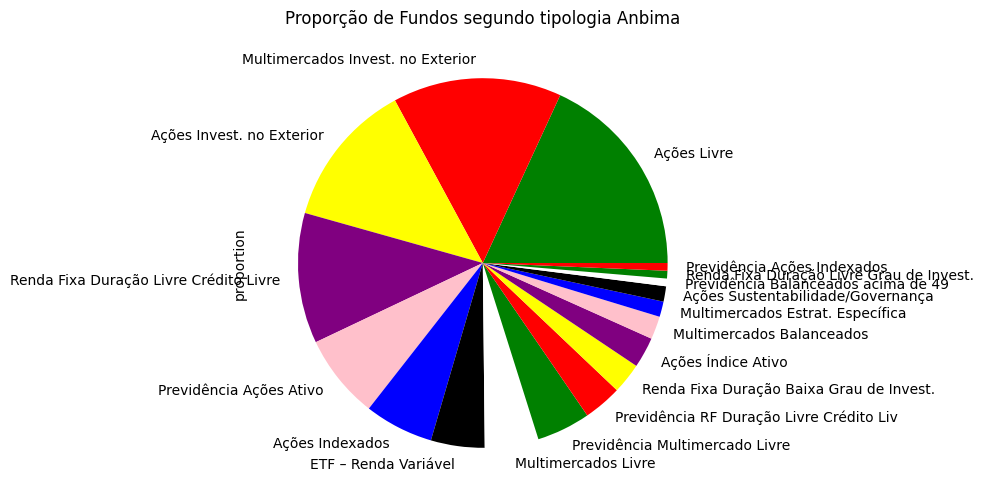

In [10]:
# Em gráfico
grafico.elaborar_grafico(dados=tipo_anbima, tipo="pie",  titulo='Proporção de Fundos segundo tipologia Anbima', x_label='Tipo Anbima', y_label='Porcentagem (%)', x_ticks_rotation=0, tight_layout=False, cores=['green', 'red', 'yellow', 'purple', 'pink', 'blue', 'black', 'white'], startangle=0)


## Proporção de fundos segundo classe estabelecida pela Anbima

In [11]:
classe_anbima = df['Classe ANBIMA'].value_counts(normalize=True) * 100
display(pd.DataFrame(classe_anbima))

,proportion
Classe ANBIMA,
Ações,40.939597
Multimercados,22.818792
Previdência,16.778523
Renda Fixa,14.765101
ETF,4.697987


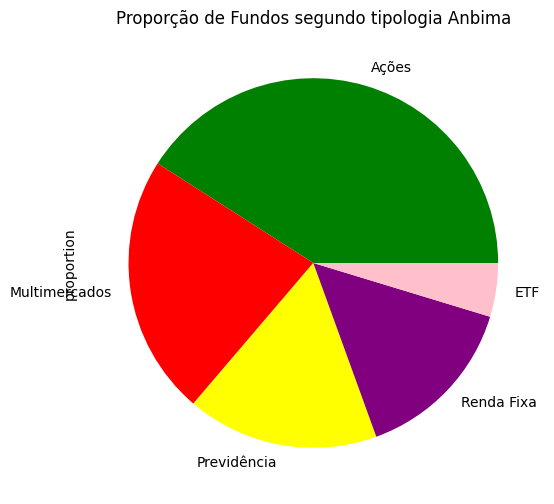

In [12]:
# Em gráfico
grafico.elaborar_grafico(dados=classe_anbima, tipo="pie",  titulo='Proporção de Fundos segundo tipologia Anbima', x_label='Tipo Anbima', y_label='Porcentagem (%)', x_ticks_rotation=0, tight_layout=False, cores=['green', 'red', 'yellow', 'purple', 'pink', 'blue'], startangle=0)


## Classe dos fundos considerados ESG pela Anbima


In [33]:
esg_classe = df[df['Fundo ESG'] == 'Sim']['Classe ANBIMA'].value_counts()
display(esg_classe)

Classe ANBIMA
Ações            42
Renda Fixa       20
Previdência      13
Multimercados     5
ETF               3
Name: count, dtype: int64

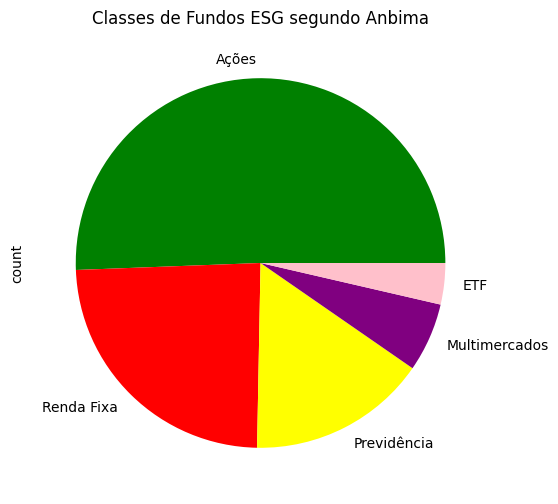

In [34]:
# Em gráfico
grafico.elaborar_grafico(dados=esg_classe, tipo="pie",  titulo='Classes de Fundos ESG segundo Anbima', x_label='Classe ANBIMA', y_label='Porcentagem (%)', x_ticks_rotation=0, tight_layout=False, cores=['green', 'red', 'yellow', 'purple', 'pink', 'blue'], startangle=0)

## 5 maiores fundos por patrimônio e respectiva classificação Anbima

In [13]:
df_ordenado = df.sort_values(by="Patrimônio Líquido", ascending=False)
top_5 = df_ordenado[["Patrimônio Líquido", 'Fundo ESG']].head(5)
display(HTML(top_5.to_html()))

,Patrimônio Líquido,Fundo ESG
Fundo,,
TREND ESG GLOBAL FI MULT,"R$ 97.596.826,64",Não
JGP CRÉDITO ESG FC FI MULT CRED PRIV IS,"R$ 93.017.651,77",Sim
BRAD IS MULTIMAN EQUI USD FC DE FIA IE,"R$ 92.696.819,93",Não
BRAD MULTI GLOBAL EQ ESG USD FIA IE,"R$ 9.771.344,91",Não
JGP ESG FC FIA - FEEDER I,"R$ 9.762.516,40",Não


## 5 fundos mais rentáveis e respectiva classificação Anbima

In [14]:
df['Rentabilidade 12 meses'] = df['Rentabilidade 12 meses'].replace(r'%', '', regex=True).replace(r',', '.', regex=True).astype(float)
df_ordenado = df.sort_values(by="Rentabilidade 12 meses", ascending=False)
top_5 = df_ordenado[["Rentabilidade 12 meses", 'Fundo ESG']].head(5)
display(HTML(top_5.to_html()))

,Rentabilidade 12 meses,Fundo ESG
Fundo,,
JGP EQ ESG PV FI MULT IE,34.24,Não
GO GLOBAL EQUITY ESG REAIS MULT IE FI,33.79,Não
BRB INVESTIMENTO SUSTENTÁVEL FIC FIA RESPONSABILIDADE LIMITADA,29.76,Sim
Mirova Glob Sust Equity Adv FIA IE IS,29.66,Sim
SANTANDER PREV ETHICAL AÇÕES SUST IS FI,29.56,Sim


### Pergunta: quais os principais gestores? Como seus fundos são classificados pela Anbima?

## Gestores mais frequentes

In [15]:
# Gestor mais frequente
display(pd.DataFrame(df['Gestor'].value_counts()))

,count
Gestor,
BB ASSET MANAGEMENT,25
JGP GESTAO DE RECURSOS LTDA,17
BRAM BRADESCO ASSET MANAGEMENT SA DTVM,17
ITAU UNIBANCO ASSET MANAGEMENT LTDA,15
XP ALLOCATION ASSET MANAGEMENT LTDA,13
BNP PARIBAS ASSET,9
SUL AMERICA INVESTIMENTOS GESTORA DE REC,6
BRADESCO,5
BTG PACTUAL,4


## Gestores ordenados segundo patrimônio líquido total

In [25]:
# Conversão da coluna 'Patrimônio Líquido' para numérica
df['Patrimônio Líquido'] = (
    df['Patrimônio Líquido']
    .replace(r'R\$', '', regex=True)
    .replace(r'\.', '', regex=True)
    .replace(',', '.', regex=True)
    .astype(float)
)

# Calculando o 'Patrimônio Líquido Total' por gestor em milhões
patrimonio_total = df.groupby('Gestor')['Patrimônio Líquido'].sum() / 1e6

# Criando a crosstab
gestor_esg_counts = pd.crosstab(df['Gestor'], df['Fundo ESG'])
gestor_esg_counts['Total'] = gestor_esg_counts.sum(axis=1)
gestor_esg_counts['Percentagem ESG'] = (gestor_esg_counts['Sim'] / gestor_esg_counts['Total']) * 100

# Inserindo 'Patrimônio Líquido Total (em milhões de reais)' no DataFrame de contagem
gestor_esg_counts['Patrimônio Líquido Total (em milhões de reais)'] = gestor_esg_counts.index.map(patrimonio_total)

# Ordenando e selecionando colunas
colunas_ordenadas = ['Total', 'Sim', 'Não', 'Relacionado', 'Percentagem ESG', 'Patrimônio Líquido Total (em milhões de reais)']
gestor_esg_counts_sorted = gestor_esg_counts.sort_values('Patrimônio Líquido Total (em milhões de reais)', ascending=False)
gestor_esg_counts_ordenado = gestor_esg_counts_sorted[colunas_ordenadas]

# Aplicando formatação para remover zeros finais e representar em milhões
gestor_esg_counts_ordenado['Percentagem ESG'] = gestor_esg_counts_ordenado['Percentagem ESG'].map(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
gestor_esg_counts_ordenado['Patrimônio Líquido Total (em milhões de reais)'] = gestor_esg_counts_ordenado['Patrimônio Líquido Total (em milhões de reais)'].map(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))


display(gestor_esg_counts_ordenado)
gestor_esg_counts_ordenado.to_clipboard()

Fundo ESG,Total,Sim,Não,Relacionado,Percentagem ESG,Patrimônio Líquido Total (em milhões de reais)
Gestor,,,,,,
BNP PARIBAS ASSET,9,9,0,0,100,4616.31
ITAU UNIBANCO ASSET MANAGEMENT LTDA,15,11,4,0,73.33,2833.22
BB ASSET MANAGEMENT,25,13,11,1,52,2692.67
SUL AMERICA INVESTIMENTOS GESTORA DE REC,6,5,1,0,83.33,2331.57
SCHRODER BRASIL,3,3,0,0,100,774.29
BRAM BRADESCO ASSET MANAGEMENT SA DTVM,17,7,10,0,41.18,651.74
JGP GESTAO DE CREDITO LTDA,3,3,0,0,100,618.1
CG INVESTIMENTOS BRAZIL LTDA,2,1,1,0,50,603.07
SANTANDER BRASIL GESTAO DE RECURSOS LTDA,4,3,1,0,75,516.37


#### Resposta: dos 10 principais gestores, 7 têm mais de 70% dos respectivos fundos considerados ESG pela Anbima. 

#### Patrimônio Líquido Total (todos os fundos): R$ 17,6 bi 

In [17]:
patrimonio_total.sum()

17607.911768050002

#### Rendimento médio anual: 15%

In [18]:
(df['Rentabilidade 12 meses'].replace(r'%', '', regex=True).replace(r',', '.', regex=True).astype(float)).sum()/len(df)

14.97530201342282